In [1]:
import numpy as np
import importlib
import kmeans
importlib.reload(kmeans)
import matplotlib.pyplot as plt
import hawks
import timeit

d:\program\python3.8\lib\site-packages\deap\tools\_hypervolume\pyhv.py:32: ImportWarning: Falling back to the python version of hypervolume module. Expect this to be very slow.
  warnings.warn("Falling back to the python version of hypervolume "


# Small data with chart

### Initialize hawks

In [2]:
SEED_NUM = 42
config = {
    "hawks": {
        "folder_name": "SimpleExample",
        "seed_num": 42,
        "save_best_data": True,
    },
    "dataset": {
        "num_clusters": 5,
        "num_dims": 2,
        "num_examples": 2000,
    },
    "objectives": {
        "silhouette": {
            "target": 0.6
        }
    },
    "ga": {
        "num_gens": 50,
        "num_indivs": 3,
    }
}
generator = hawks.create_generator(config)
generator.run()

d:\program\python3.8\lib\site-packages\hawks\generator.py:196: UserWarning: D:\Mon hoc\Nam 3 ky 2\khai pha du lieu\assignment\SimpleExample already exists - previous results may be overwritten!
  warnings.warn(
Runs:   0%|          | 0/1 [00:00<?, ?it/s]

Generations:   0%|          | 0/49 [00:00<?, ?it/s]

Generations:   2%|▏         | 1/49 [00:00<00:10,  4.46it/s]

Generations:   4%|▍         | 2/49 [00:00<00:13,  3.46it/s]

Generations:   6%|▌         | 3/49 [00:00<00:11,  3.89it/s]

Generations:   8%|▊         | 4/49 [00:01<00:12,  3.48it/s]

Generations:  10%|█         | 5/49 [00:01<00:13,  3.28it/s]

Generations:  12%|█▏        | 6/49 [00:01<00:11,  3.89it/s]

Generations:  14%|█▍        | 7/49 [00:01<00:12,  3.38it/s]

Generations:  16%|█▋        | 8/49 [00:02<00:11,  3.55it/s]

Generations:  18%|█▊        | 9/49 [00:02<00:11,  3.50it/s]

Generations:  20%|██        | 10/49 [00:02<00:12,  3.19it/s]

Generations:  22%|██▏       | 11/49 [00:03<00:13,  2.83it/s]

Generations:  24%|

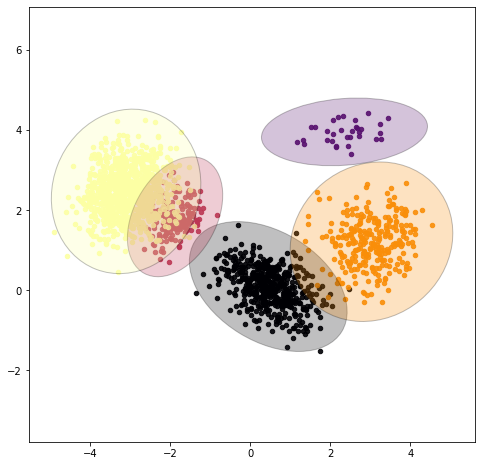

In [3]:
generator.plot_best_indivs(show=True)

In [4]:
datasets, label_sets = generator.get_best_dataset()

In [5]:
data, labels = datasets[0], label_sets[0]

# Some params

In [6]:
num_cluster = 5
n_iter = 1
point_colors = ['yellow', 'purple', 'cyan', 'magenta', 'orange']

## Initialize MinibatchKMeans instance

In [24]:
km = kmeans.MiniBatchKMeans(n_clusters = num_cluster, max_iter=1000, batch_size=1000, tol=1e-4)

In [25]:
%%time
km.fit(data, verbose=False)

Stopped because of tol
Sum:  7.984690909925195e-05
Num of inter:  14
Wall time: 324 ms


Time:  0
Stopped because of tol
Sum:  3.105472977035088e-05
Num of inter:  17
Inerita:  1182.4582300349543


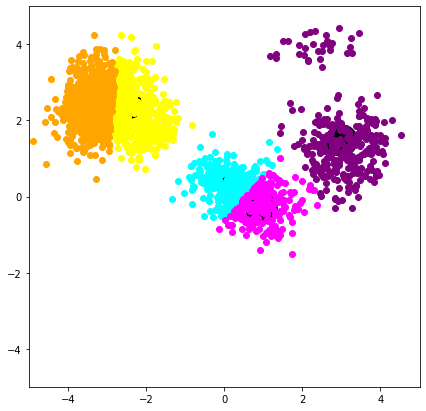

Wall time: 525 ms


In [26]:
%%time
for it in range(n_iter):
    print("Time: ", it)
    km.fit(data, verbose=False)
    print("Inerita: ", km.inerita_)
    plt.figure(figsize=(7,7))
    for i in range(num_cluster):
        plt.scatter(km.cluster_centers_[i][0], km.cluster_centers_[i][1], s = 1000, color='black')
        plt.scatter(data[km.label_ == i][:, 0], data[km.label_ == i][:, 1], color = point_colors[i])
        plt.xlim([-5, 5])
        plt.ylim([-5, 5])
    plt.show()

# Kmean plus plus

In [114]:
km = kmeans.MiniBatchKMeans(n_clusters = num_cluster, max_iter=1000, batch_size=50, init='kmeansplusplus', tol=1e-4)

In [115]:
%%time
km.fit(data, verbose=False)

Stopped because of tol
Sum:  7.119017074233444e-05
Num of inter:  37
Wall time: 80.8 ms


Time:  0
Stopped because of tol
Sum:  6.53509441015527e-05
Num of inter:  35
Inerita:  1478.8293999743219


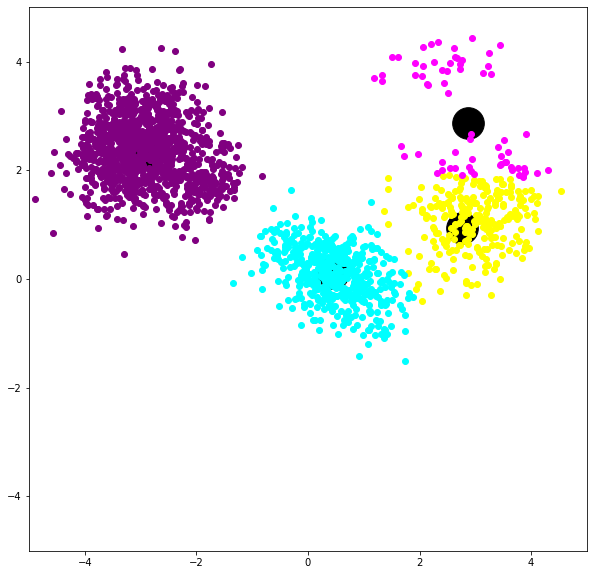

Time:  1
Stopped because of tol
Sum:  9.249123352885713e-05
Num of inter:  30
Inerita:  1303.5791978647494


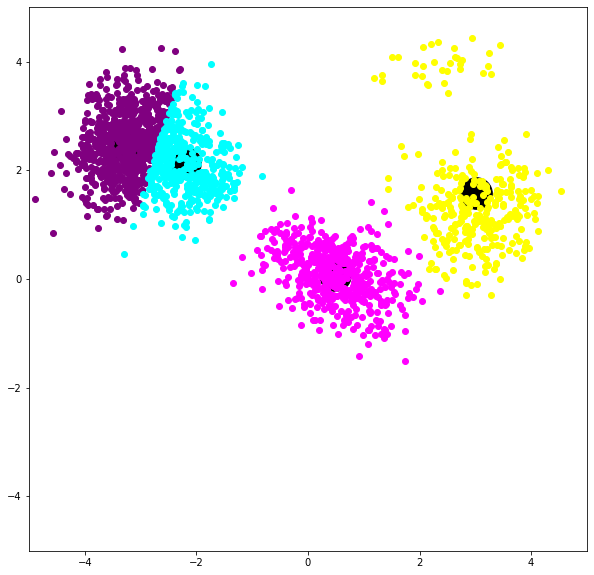

Time:  2
Stopped because of tol
Sum:  6.586724514798683e-05
Num of inter:  38
Inerita:  1435.0880288591675


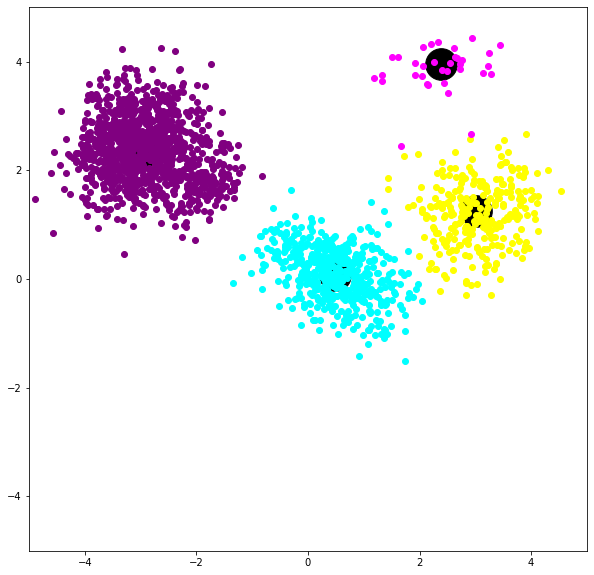

Time:  3
Stopped because of tol
Sum:  3.857410539478045e-05
Num of inter:  28
Inerita:  1300.2661305583142


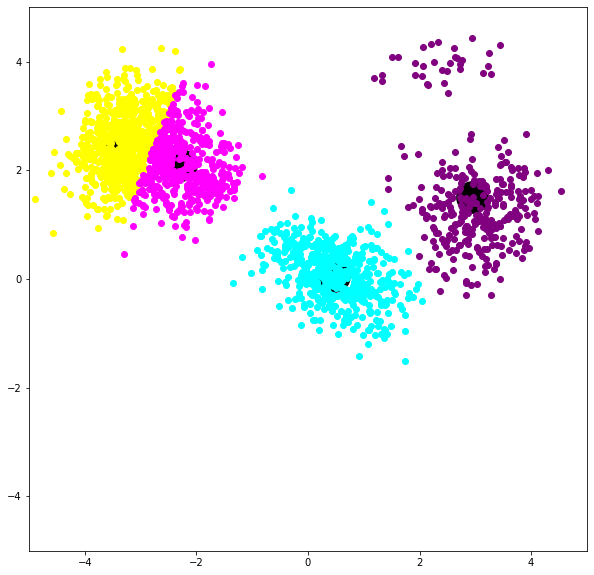

Time:  4
Stopped because of tol
Sum:  4.899799237900264e-05
Num of inter:  32
Inerita:  1436.5985040029748


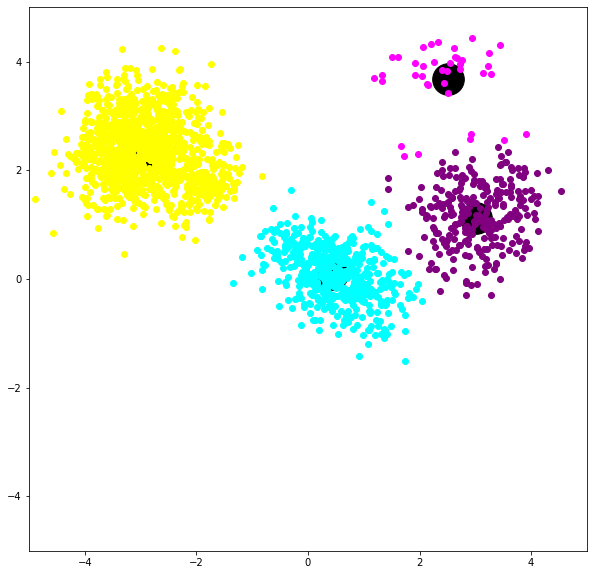

Time:  5
Stopped because of tol
Sum:  1.7934285122023347e-05
Num of inter:  45
Inerita:  1435.679668155089


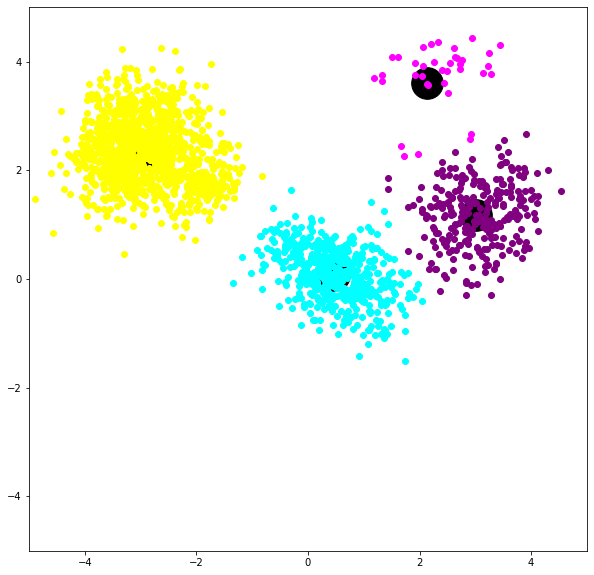

Time:  6
Stopped because of tol
Sum:  4.060899511515597e-05
Num of inter:  34
Inerita:  1437.073184032251


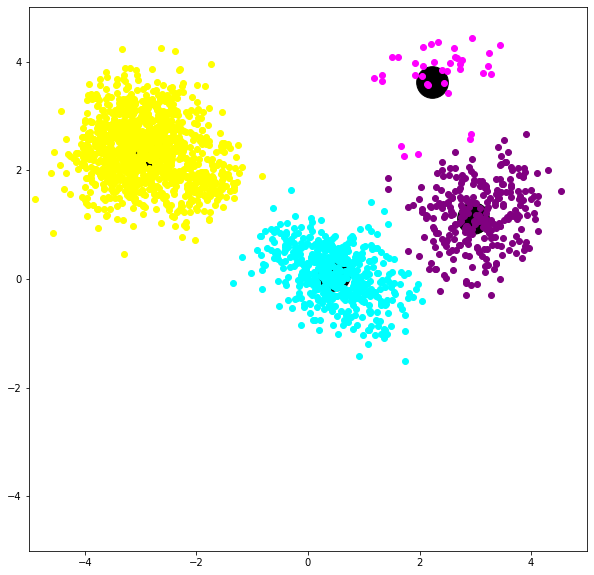

Time:  7
Stopped because of tol
Sum:  9.986005538925903e-05
Num of inter:  27
Inerita:  1300.7204711013712


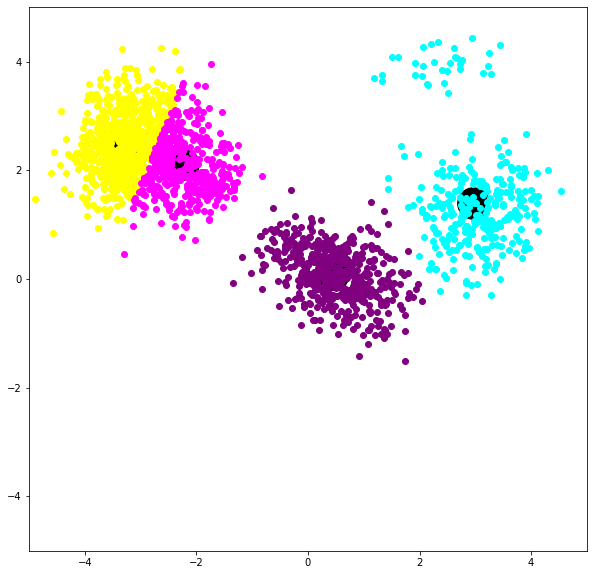

Time:  8
Stopped because of tol
Sum:  5.3587578232595046e-05
Num of inter:  40
Inerita:  1296.603946229101


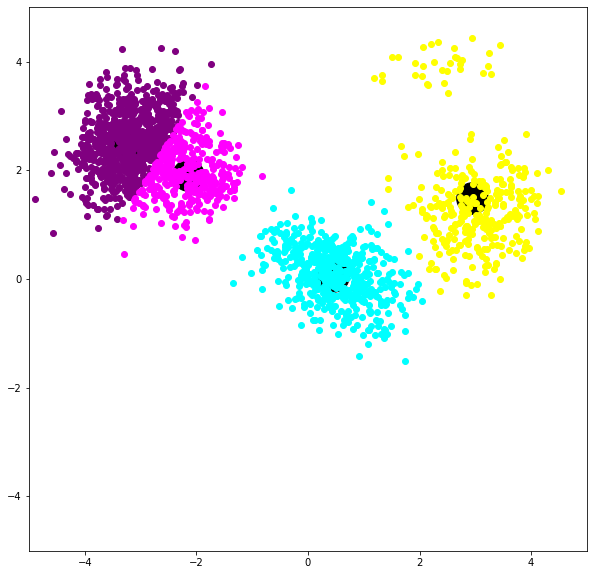

Time:  9
Stopped because of tol
Sum:  8.775559302658426e-05
Num of inter:  27
Inerita:  1301.1821800216426


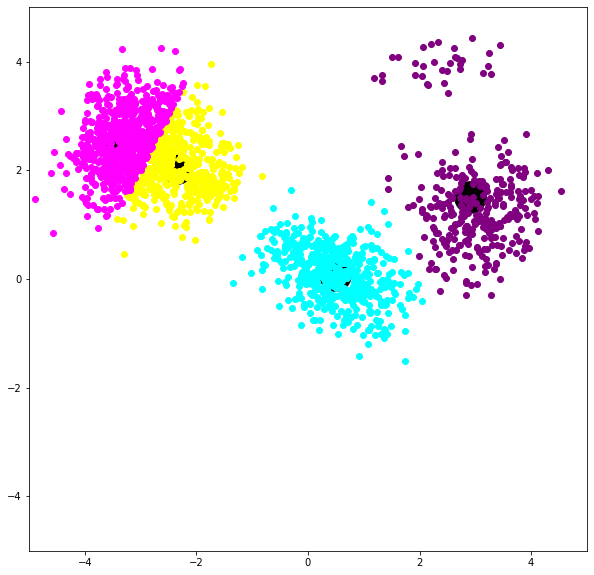

Wall time: 2.33 s


In [116]:
%%time
for it in range(n_iter):
    print("Time: ", it)
    km.fit(data, verbose=False)
    print("Inerita: ", km.inerita_)
    plt.figure(figsize=(10,10))
    for i in range(num_cluster):
        plt.scatter(km.cluster_centers_[i][0], km.cluster_centers_[i][1], s = 1000, color='black')
        plt.scatter(data[km.label_ == i][:, 0], data[km.label_ == i][:, 1], color = point_colors[i])
        plt.xlim([-5, 5])
        plt.ylim([-5, 5])
    plt.show()

# Big data

In [204]:
num_points = 100000

In [205]:
num_cluster = 10

In [206]:
data = np.random.rand(num_points, 50)

In [207]:
km = kmeans.MiniBatchKMeans(n_clusters = num_cluster, max_iter=2048, batch_size=2048, tol=1e-6)

In [208]:
%%time
km.fit(data)

Iteration:  0 / 2048
Iteration:  1 / 2048
Iteration:  2 / 2048
Iteration:  3 / 2048
Iteration:  4 / 2048
Iteration:  5 / 2048
Iteration:  6 / 2048
Iteration:  7 / 2048
Iteration:  8 / 2048
Iteration:  9 / 2048
Iteration:  10 / 2048
Iteration:  11 / 2048
Iteration:  12 / 2048
Iteration:  13 / 2048
Iteration:  14 / 2048
Iteration:  15 / 2048
Iteration:  16 / 2048
Iteration:  17 / 2048
Iteration:  18 / 2048
Iteration:  19 / 2048
Iteration:  20 / 2048
Iteration:  21 / 2048
Iteration:  22 / 2048
Iteration:  23 / 2048
Iteration:  24 / 2048
Iteration:  25 / 2048
Iteration:  26 / 2048
Iteration:  27 / 2048
Iteration:  28 / 2048
Iteration:  29 / 2048
Iteration:  30 / 2048
Iteration:  31 / 2048
Iteration:  32 / 2048
Iteration:  33 / 2048
Iteration:  34 / 2048
Iteration:  35 / 2048
Iteration:  36 / 2048
Iteration:  37 / 2048
Iteration:  38 / 2048
Iteration:  39 / 2048
Iteration:  40 / 2048
Iteration:  41 / 2048
Iteration:  42 / 2048
Iteration:  43 / 2048
Iteration:  44 / 2048
Iteration:  45 / 204

In [209]:
km.inerita_

394587.00888999173

# Birch dataset 3

In [70]:
birch_data = np.loadtxt("birch3.txt")
num_clusters = 100

In [71]:
km = kmeans.MiniBatchKMeans(n_clusters = num_clusters, max_iter=2048, batch_size=2048)

In [72]:
%%time
km.fit(birch_data, verbose=False)

Stopped because no label changed or lower than stop_size
Num of inter:  489
Wall time: 21.3 s


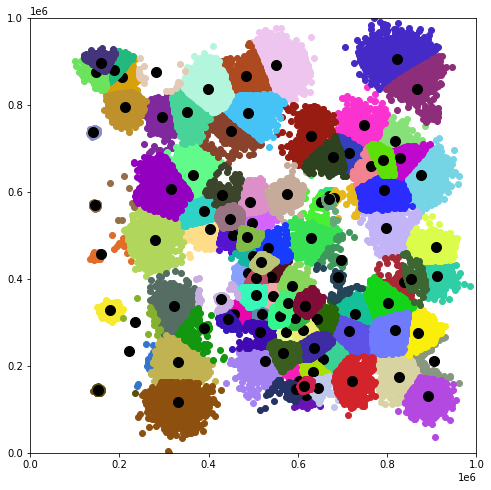

In [74]:
plt.figure(figsize=(8,8))
for i in range(num_clusters):
    plt.scatter(birch_data[km.label_ == i][:, 0], birch_data[km.label_ == i][:, 1], color=np.random.rand(3,))
    plt.scatter(km.cluster_centers_[i][0], km.cluster_centers_[i][1], s = 100, color='black')
    plt.xlim([0, 1000000])
    plt.ylim([0, 1000000])
plt.show()

# Birch data 3 with kmeans plus plus

In [65]:
birch_data = np.loadtxt("birch3.txt")
num_clusters = 100

In [66]:
km = kmeans.MiniBatchKMeans(n_clusters = num_clusters, max_iter=2048, batch_size=2048, init="kmeansplusplus")

In [67]:
%%time
km.fit(birch_data, verbose=False)

Stopped because no label changed or lower than stop_size
Num of inter:  412
Wall time: 38.8 s


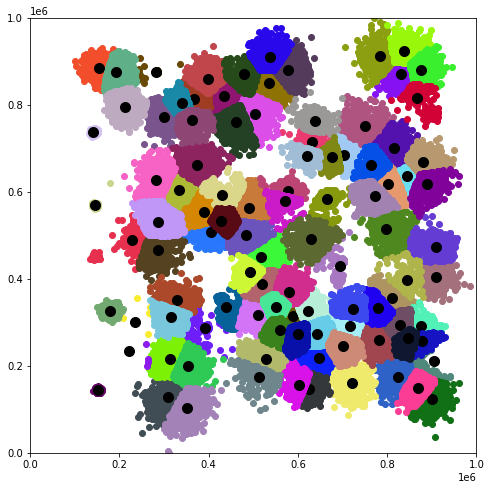

In [69]:
plt.figure(figsize=(8,8))
for i in range(num_clusters):
    plt.scatter(birch_data[km.label_ == i][:, 0], birch_data[km.label_ == i][:, 1], color=np.random.rand(3,))
    plt.scatter(km.cluster_centers_[i][0], km.cluster_centers_[i][1], s = 100, color='black')
    plt.xlim([0, 1000000])
    plt.ylim([0, 1000000])
plt.show()

In [271]:
km.inerita_

412656733348286.2

# Birch dataset 2

In [49]:
birch_data = np.loadtxt("birch2.txt")
num_clusters = 100

In [50]:
km = kmeans.MiniBatchKMeans(n_clusters = num_clusters, max_iter=2048, batch_size=2048)

In [51]:
%%time
km.fit(birch_data, verbose=False)

Stopped because no label changed or lower than stop_size
Num of inter:  347
Wall time: 16.7 s


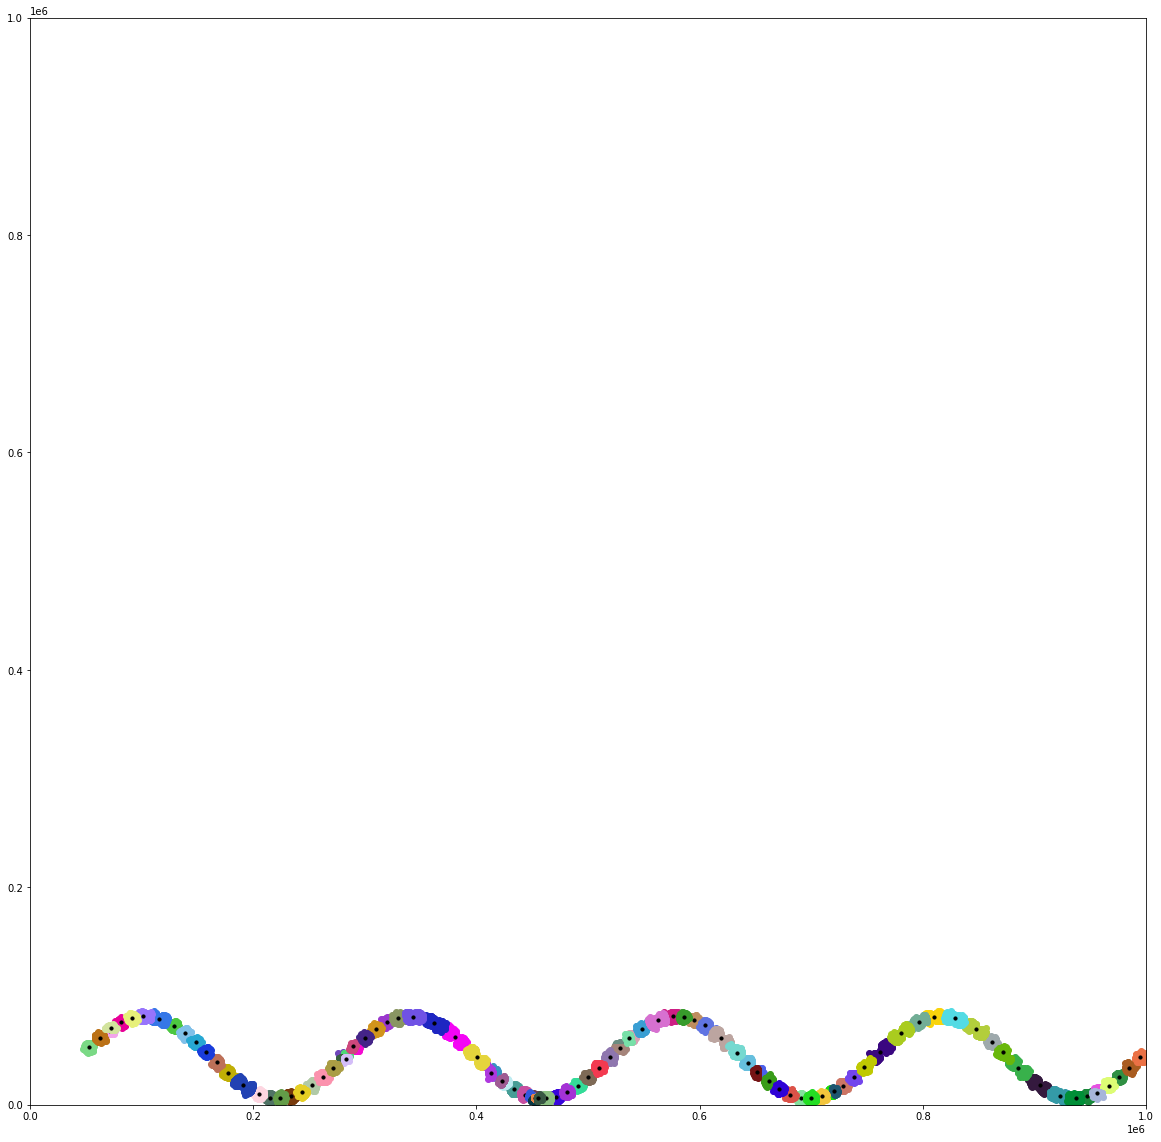

In [52]:
plt.figure(figsize=(20,20))
for i in range(num_clusters):
    plt.scatter(birch_data[km.label_ == i][:, 0], birch_data[km.label_ == i][:, 1], color=np.random.rand(3,))
    plt.scatter(km.cluster_centers_[i][0], km.cluster_centers_[i][1], s = 10, color='black')
    plt.xlim([0, 1000000])
    plt.ylim([0, 1000000])
plt.show()

# Birch dataset 2 with kmeans plus plus

In [53]:
birch_data = np.loadtxt("birch2.txt")
num_clusters = 100

In [54]:
km = kmeans.MiniBatchKMeans(n_clusters = num_clusters, max_iter=2048, batch_size=2048, init="kmeansplusplus")

In [55]:
%%time
km.fit(birch_data, verbose=False)

Stopped because no label changed or lower than stop_size
Num of inter:  339
Wall time: 37.3 s


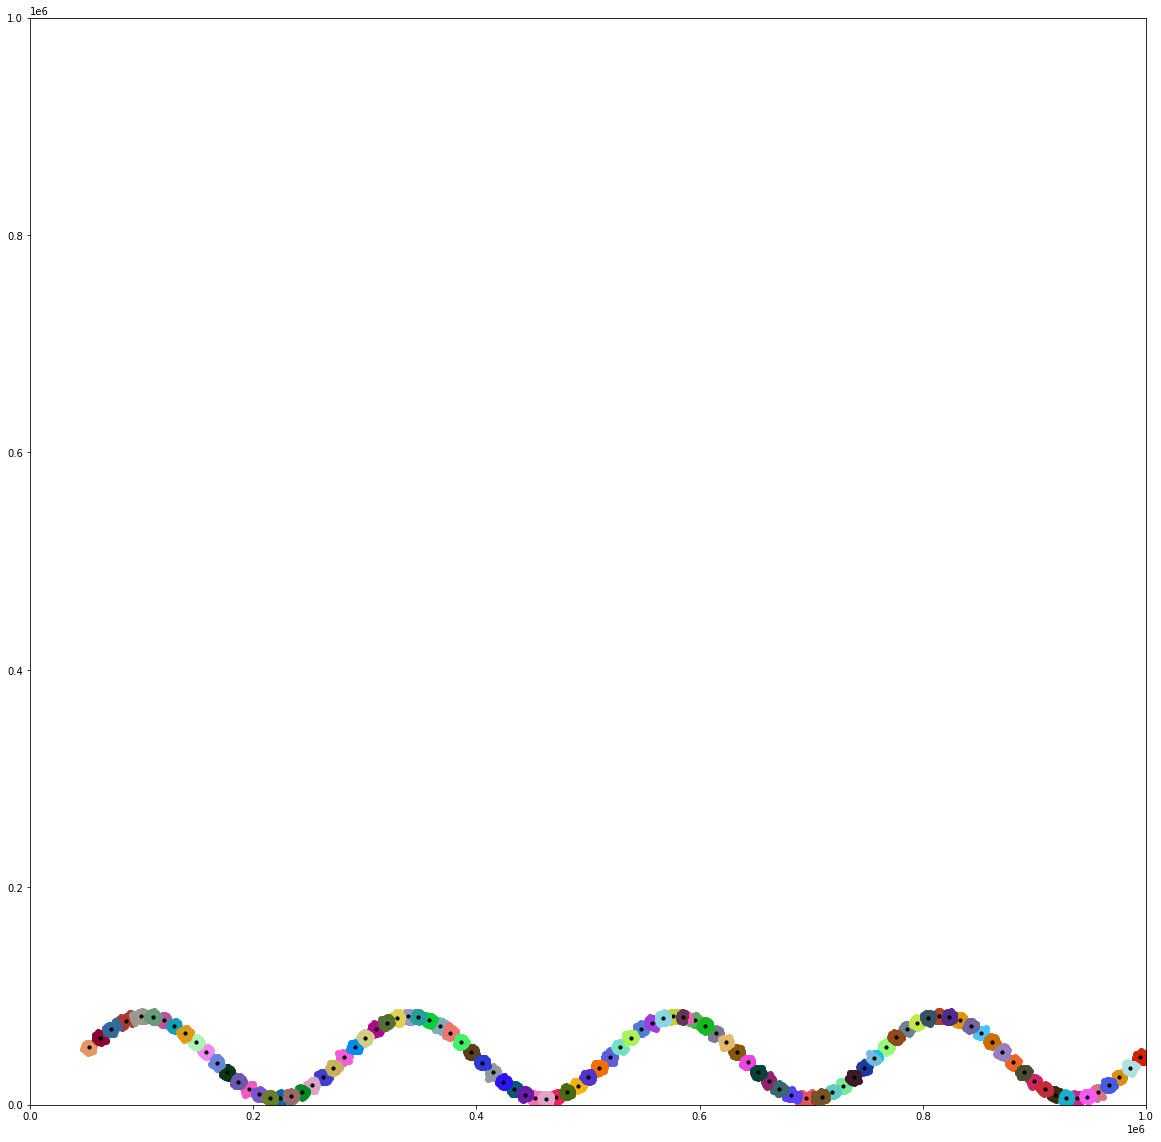

In [56]:
plt.figure(figsize=(20,20))
for i in range(num_clusters):
    plt.scatter(birch_data[km.label_ == i][:, 0], birch_data[km.label_ == i][:, 1], color=np.random.rand(3,))
    plt.scatter(km.cluster_centers_[i][0], km.cluster_centers_[i][1], s = 10, color='black')
    plt.xlim([0, 1000000])
    plt.ylim([0, 1000000])
plt.show()

# Birch dataset 1 with kmeans

In [40]:
birch_data = np.loadtxt("birch1.txt")
num_clusters = 100

In [41]:
km = kmeans.MiniBatchKMeans(n_clusters = num_clusters, max_iter=2048, batch_size=2048)

In [42]:
%%time
km.fit(birch_data, verbose=False)

Stopped because no label changed or lower than stop_size
Num of inter:  609
Wall time: 26.8 s


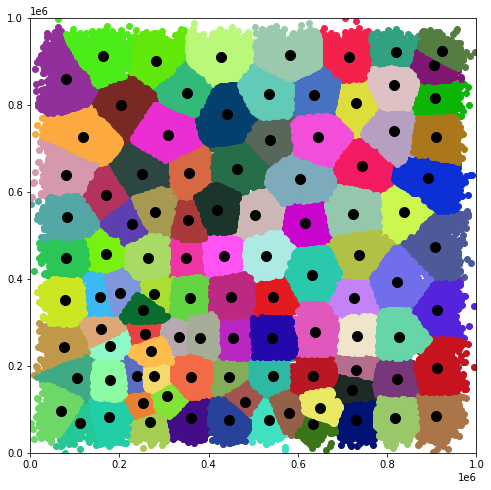

In [43]:
plt.figure(figsize=(8,8))
for i in range(num_clusters):
    plt.scatter(birch_data[km.label_ == i][:, 0], birch_data[km.label_ == i][:, 1], color=np.random.rand(3,))
    plt.scatter(km.cluster_centers_[i][0], km.cluster_centers_[i][1], s = 100, color='black')
    plt.xlim([0, 1000000])
    plt.ylim([0, 1000000])
plt.show()

# Birch dataset 1 with kmeans plus plus

In [44]:
birch_data = np.loadtxt("birch1.txt")
num_clusters = 100

In [45]:
km = kmeans.MiniBatchKMeans(n_clusters = num_clusters, max_iter=2048, batch_size=2048, init="kmeansplusplus")

In [46]:
%%time
km.fit(birch_data, verbose=False)

Stopped because no label changed or lower than stop_size
Num of inter:  453
Wall time: 41.2 s


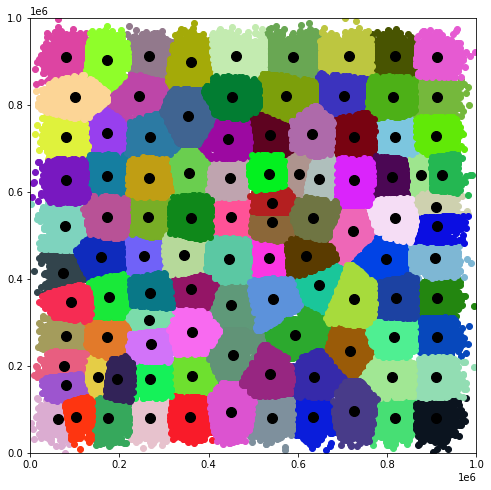

In [48]:
plt.figure(figsize=(8,8))
for i in range(num_clusters):
    plt.scatter(birch_data[km.label_ == i][:, 0], birch_data[km.label_ == i][:, 1], color=np.random.rand(3,))
    plt.scatter(km.cluster_centers_[i][0], km.cluster_centers_[i][1], s = 100, color='black')
    plt.xlim([0, 1000000])
    plt.ylim([0, 1000000])
plt.show()

# test birch1 with sklearn

In [11]:
from sklearn.cluster import KMeans

In [12]:
birch_data = np.loadtxt("birch1.txt")
num_clusters = 100

In [18]:
%%time
km = KMeans(n_clusters=num_clusters, random_state=0, n_init=1, algorithm='full', init='random', tol=0.0).fit(birch_data)

Wall time: 1.01 s


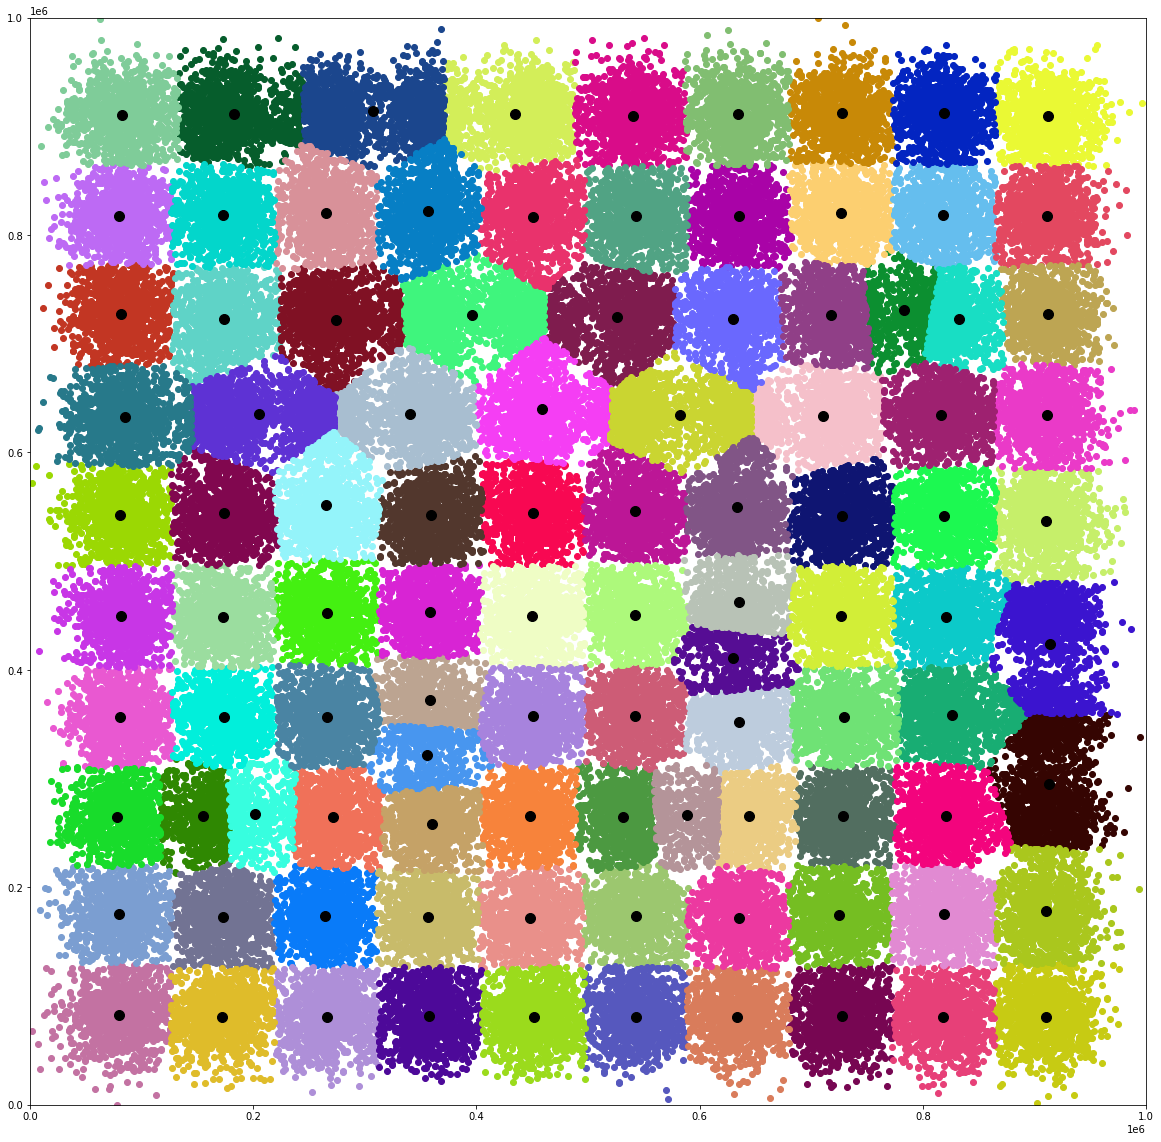

In [15]:
plt.figure(figsize=(20,20))
for i in range(num_clusters):
    plt.scatter(birch_data[km.labels_ == i][:, 0], birch_data[km.labels_ == i][:, 1], color=np.random.rand(3,))
    plt.scatter(km.cluster_centers_[i][0], km.cluster_centers_[i][1], s = 100, color='black')
    plt.xlim([0, 1000000])
    plt.ylim([0, 1000000])
plt.show()

# test birch1 with sklearn minibatchkmeans

In [33]:
from sklearn.cluster import MiniBatchKMeans

In [34]:
birch_data = np.loadtxt("birch1.txt")
num_clusters = 100

In [35]:
%%time
km = MiniBatchKMeans(n_clusters=num_clusters, random_state=0, n_init=1).fit(birch_data)

Wall time: 1.38 s


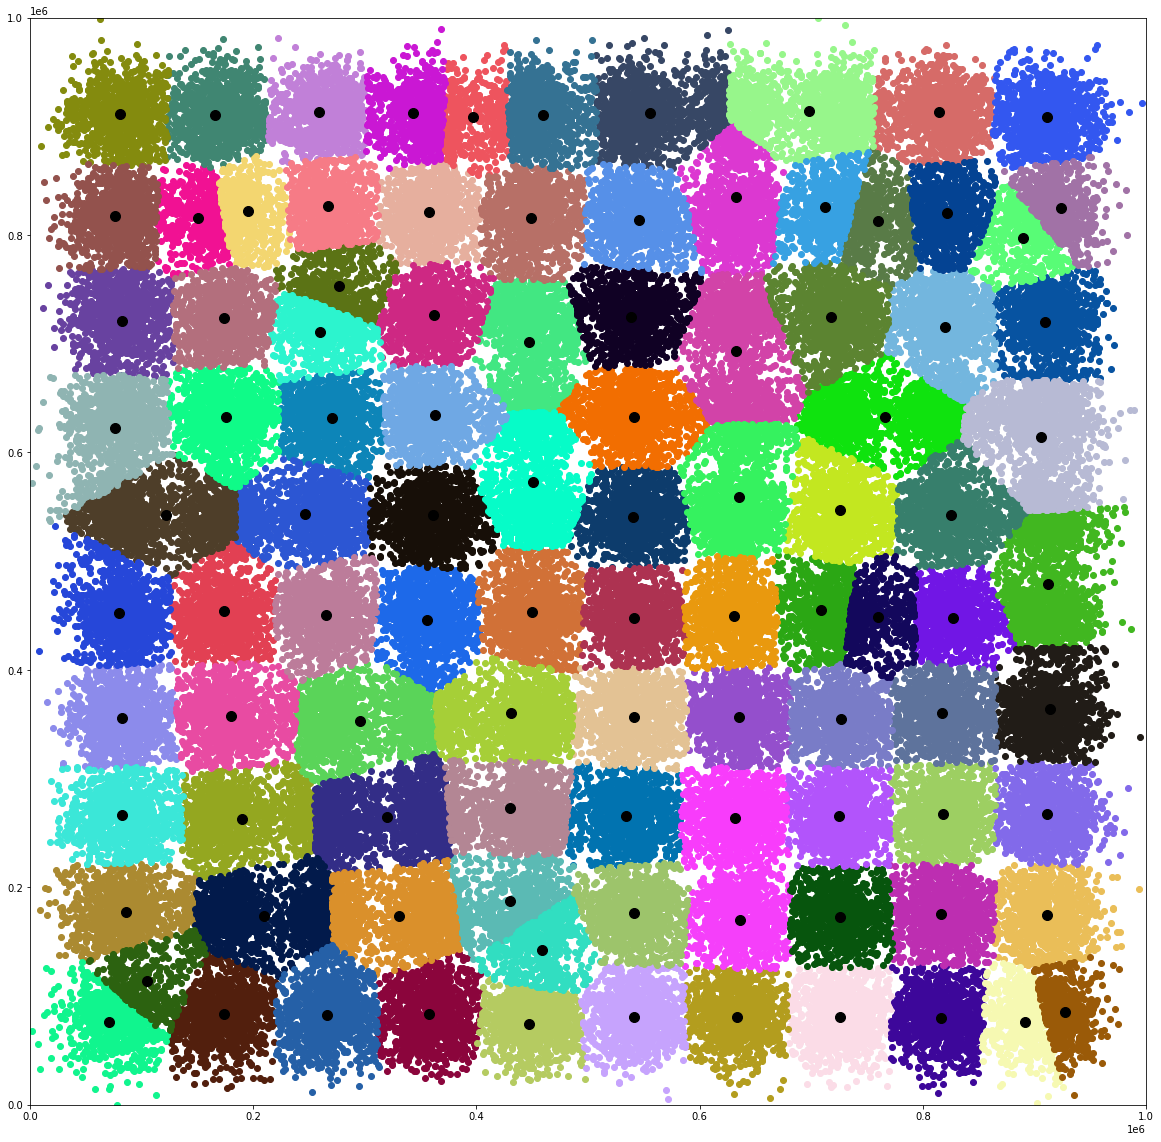

In [36]:
plt.figure(figsize=(20,20))
for i in range(num_clusters):
    plt.scatter(birch_data[km.labels_ == i][:, 0], birch_data[km.labels_ == i][:, 1], color=np.random.rand(3,))
    plt.scatter(km.cluster_centers_[i][0], km.cluster_centers_[i][1], s = 100, color='black')
    plt.xlim([0, 1000000])
    plt.ylim([0, 1000000])
plt.show()

# Automatically determine K

In [ ]:
%%time
max_clusters_num = 50
error = []
execution_times = []
for cl in range(1, max_clusters_num + 1):
    km = kmeans.MiniBatchKMeans(n_clusters = cl, max_iter=2048, batch_size=1024, init="kmeansplusplus", stop_size=2)
    start = timeit.default_timer()
    km.fit(birch_data, verbose=False)
    stop = timeit.default_timer()
    print("executed time for ", cl, " clusters: ", (stop-start), " Seconds")
    execution_times.append(stop - start)
    plt.figure(figsize=(20,20))
    for i in range(cl):
        plt.scatter(birch_data[km.label_ == i][:, 0], birch_data[km.label_ == i][:, 1], color=np.random.rand(3,))
        plt.scatter(km.cluster_centers_[i][0], km.cluster_centers_[i][1], s = 100, color='black')
        plt.xlim([0, 1000000])
        plt.ylim([0, 1000000])
    fig = plt.gcf()
    fig.savefig("minibatchkmeans/" + str(cl)+".png")
    plt.show()
    error.append(km.inerita_)

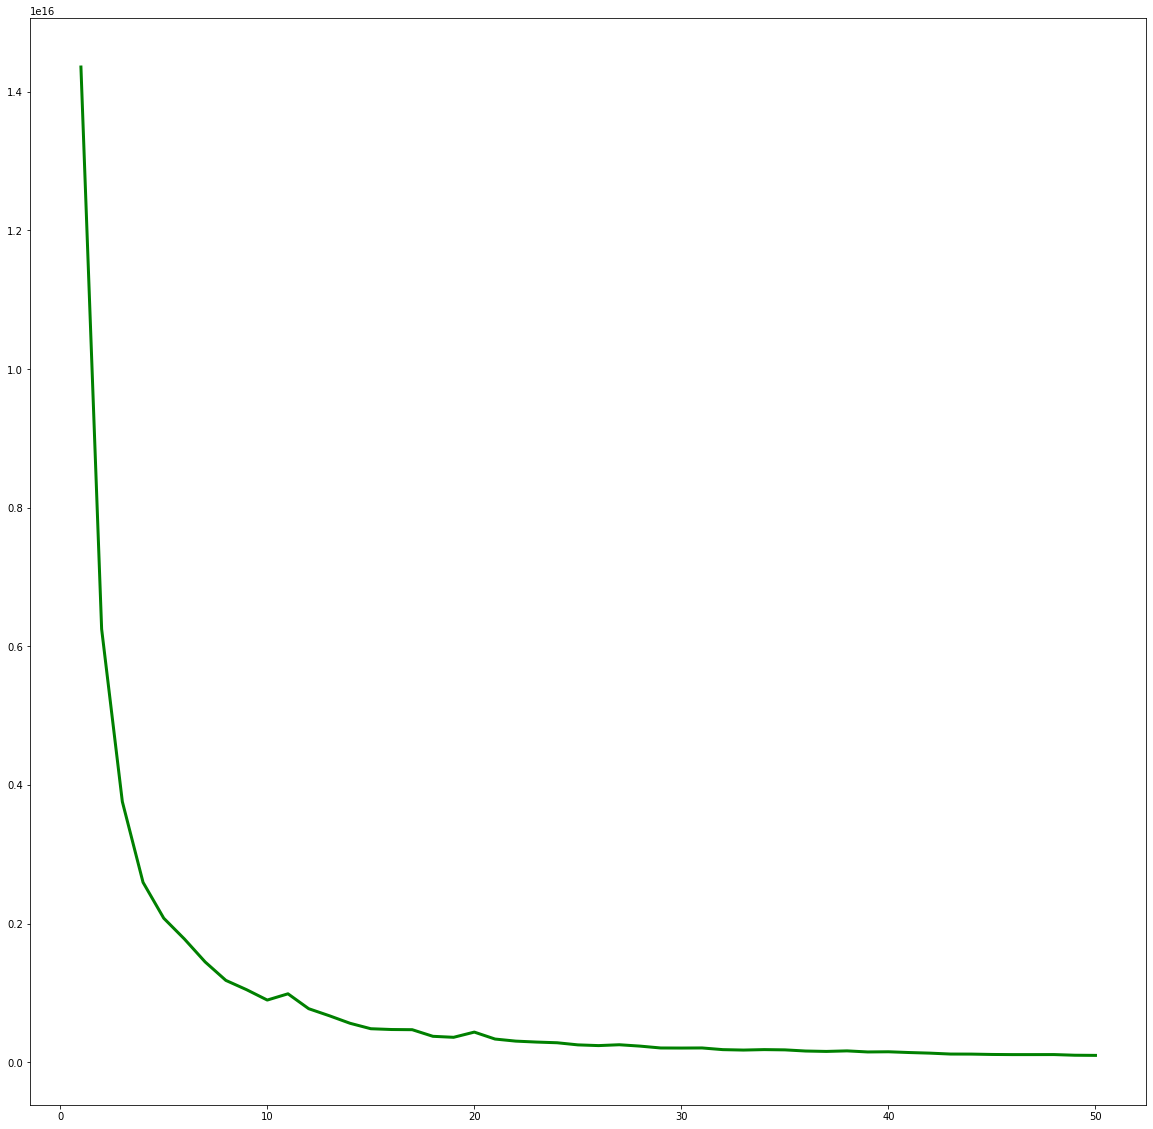

In [286]:
plt.figure(figsize=(20,20))
plt.plot(range(1, max_clusters_num + 1), error, color ='g', linewidth ='3')
fig = plt.gcf()
fig.savefig("minibatchkmeans/summary.png")
plt.show()

In [287]:
np.savetxt("minibatchkmeans/error.txt", error)

In [288]:
np.savetxt("minibatchkmeans/execution_time.txt", execution_times)

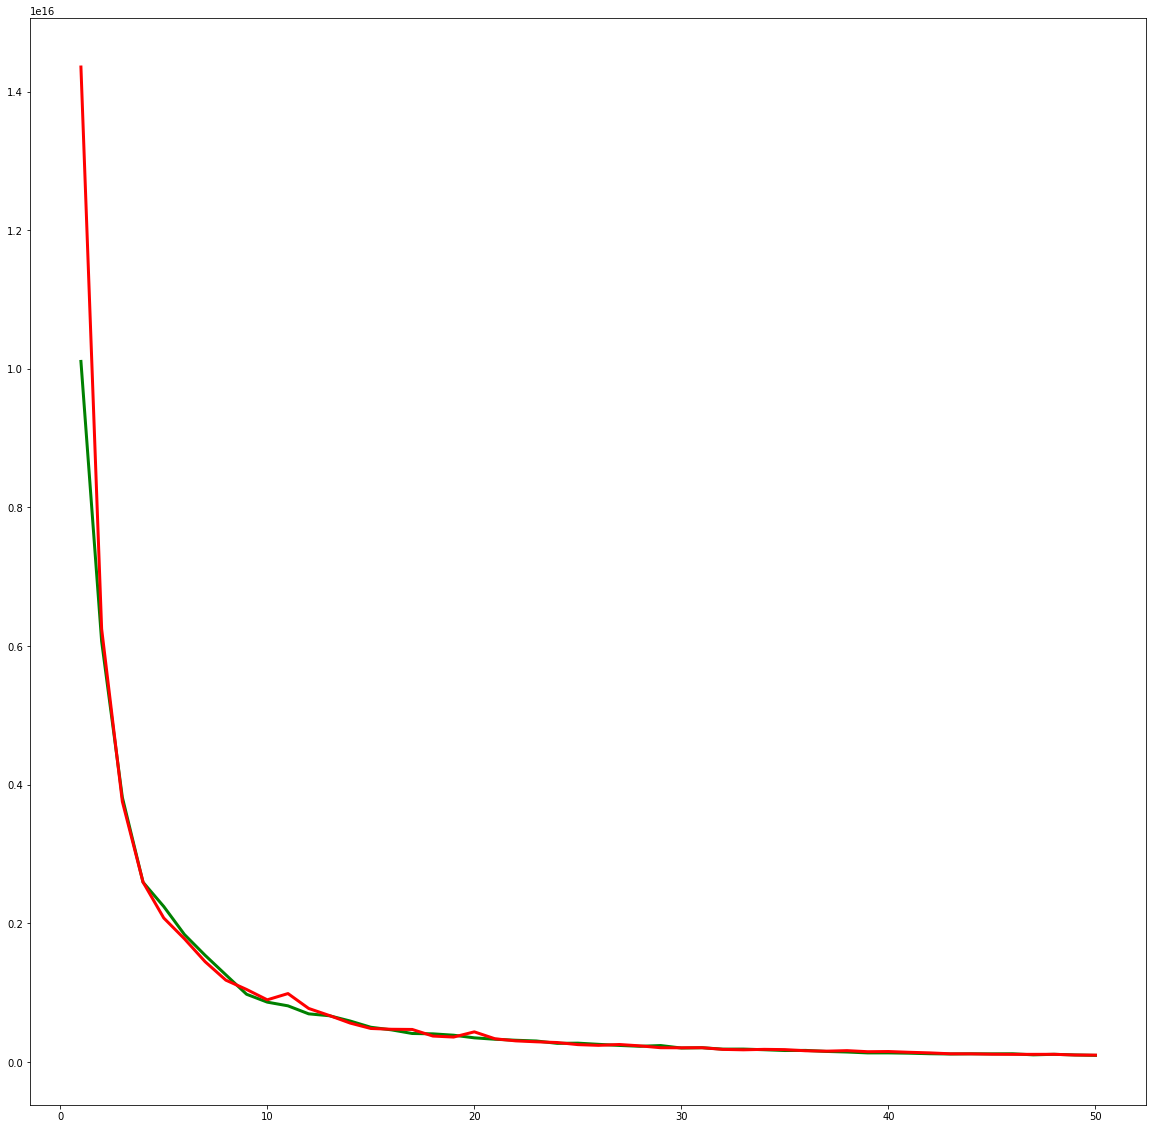

In [289]:
normal_error = np.loadtxt("kmeans/error.txt")
minibatch_error = np.loadtxt("minibatchkmeans/error.txt")

plt.figure(figsize=(20,20))
plt.plot(range(1, max_clusters_num + 1), normal_error, color ='g', linewidth ='3')
plt.plot(range(1, max_clusters_num + 1), minibatch_error, color ='r', linewidth ='3')
fig = plt.gcf()
fig.savefig("minibatchkmeans/compare_error.png")
plt.show()

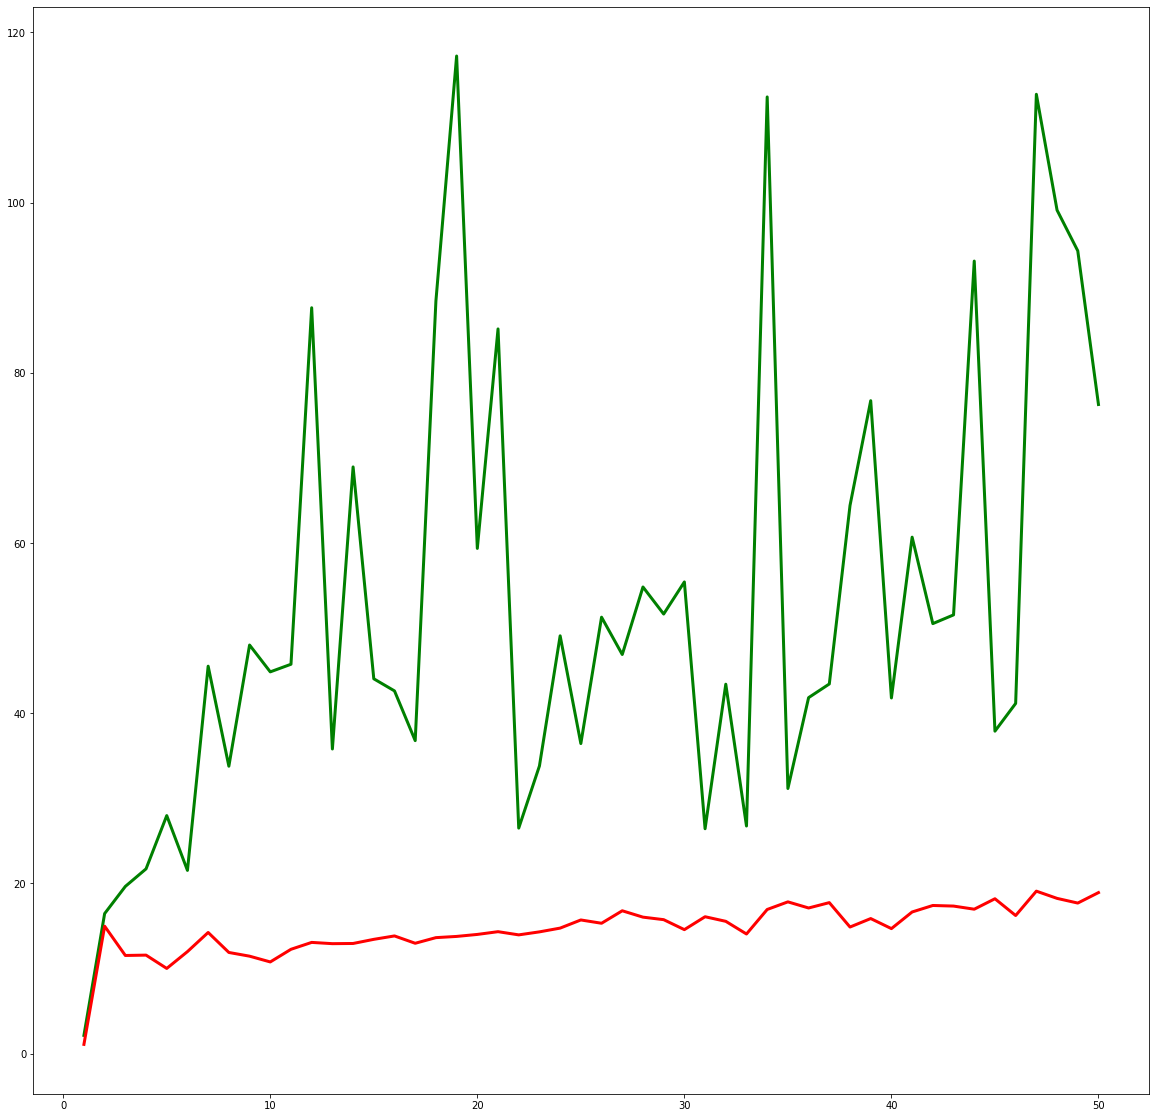

In [290]:
normal_execution_time = np.loadtxt("kmeans/execution_time.txt")
minibatch_execution_time = np.loadtxt("minibatchkmeans/execution_time.txt")

plt.figure(figsize=(20,20))
plt.plot(range(1, max_clusters_num + 1), normal_execution_time, color ='g', linewidth ='3')
plt.plot(range(1, max_clusters_num + 1), minibatch_execution_time, color ='r', linewidth ='3')
fig = plt.gcf()
fig.savefig("minibatchkmeans/compare_execution_time.png")
plt.show()